In [1]:
#Importing data
import pandas as pd

data = pd.read_csv('pollution_us_2000_2016.csv', header=0)
print(data.head())

   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
##Dropping unneccessary columns
data = data.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
data.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [5]:
data.drop_duplicates()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


In [7]:
## Prepare all 4 AQIs against state and date 
dataSt = data[['State','Date Local','NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]
dataSt = dataSt.dropna(axis='rows')  # Delete rows with NAs
dataSt = dataSt[dataSt.State!='Country Of Mexico'] #Delete Mexico since we're interested in the US
dataSt['Date Local'] = pd.to_datetime(dataSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value


In [10]:
#going to group by date. There are duplicates, so I'm taking the mean values of those.
dataSt = dataSt.groupby(['Date Local']).mean()  # Take mean values if there are depulicated entries


In [11]:
yn = dataSt['NO2 AQI'].resample('M').mean()
yo = dataSt['O3 AQI'].resample('M').mean()
yc = dataSt['CO AQI'].resample('M').mean()
ys = dataSt['SO2 AQI'].resample('M').mean()

In [12]:
yn.head(5)

Date Local
2000-01-31    36.634535
2000-02-29    35.046450
2000-03-31    32.233823
2000-04-30    30.944411
2000-05-31    28.748345
Freq: M, Name: NO2 AQI, dtype: float64

#I've lost the state column. I'm going to analyze everything together, and then maybe seperate out by state later.

Text(0, 0.5, 'CO AQI')

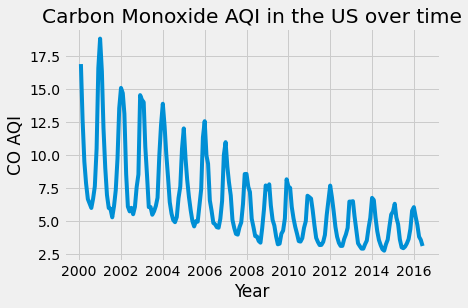

In [15]:
plt.plot(yc)
plt.title('Carbon Monoxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('CO AQI')

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Text(0, 0.5, 'CO AQI')

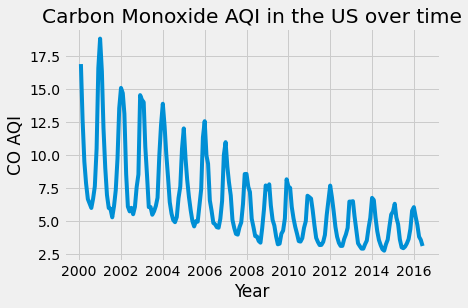

In [14]:
#as a refresh:
plt.plot(yc)
plt.title('Carbon Monoxide AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('CO AQI')

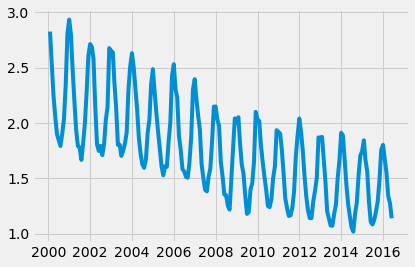

In [15]:
#log of co aqi levels
plt.plot(np.log(yc))

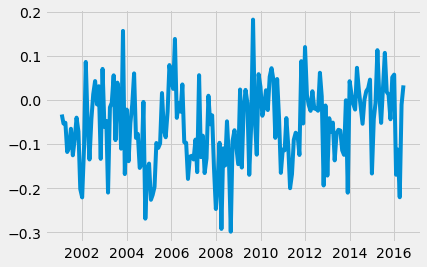

In [16]:
#remove seasonality
plt.plot(np.log(yc).diff(12))

In [17]:
result = adfuller(yc)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.2181451610538392


In [18]:
yc2 = np.log(yc).diff(12).dropna()

In [19]:
result = adfuller(yc2)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.002905457626957266


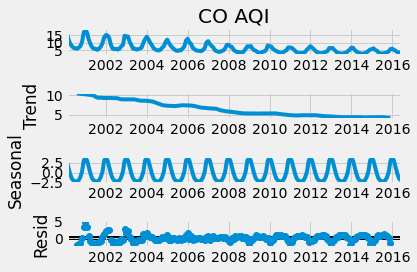

In [20]:
# Perform additive decomposition
decomp = seasonal_decompose(yc, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yc2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-301.36452899004826
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-282.441281717493
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-161.64664165381203
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-279.79324443549785
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-284.0362626397231
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-312.09178478957233
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-236.37271706148698
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-299.0965855391138
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-325.1506053631355
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-306.2249284096931
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-162.42407369756674
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-286.8774549979364
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-312.1995464548542
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-309.1481046966659
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-246.07587928578624
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-314.27753893947573
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-292.0068569540326
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-354

#Looks like -410.618 is the lowest AIC, so our model orders are (1,1,1)x(1,0,1,12)12

                                     SARIMAX Results                                      
Dep. Variable:                             CO AQI   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 210.309
Date:                            Wed, 07 Jul 2021   AIC                           -410.619
Time:                                    14:35:20   BIC                           -394.940
Sample:                                01-31-2001   HQIC                          -404.256
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1761      0.104      1.692      0.091      -0.028       0.380
ma.L1         -0.8271      0.057   

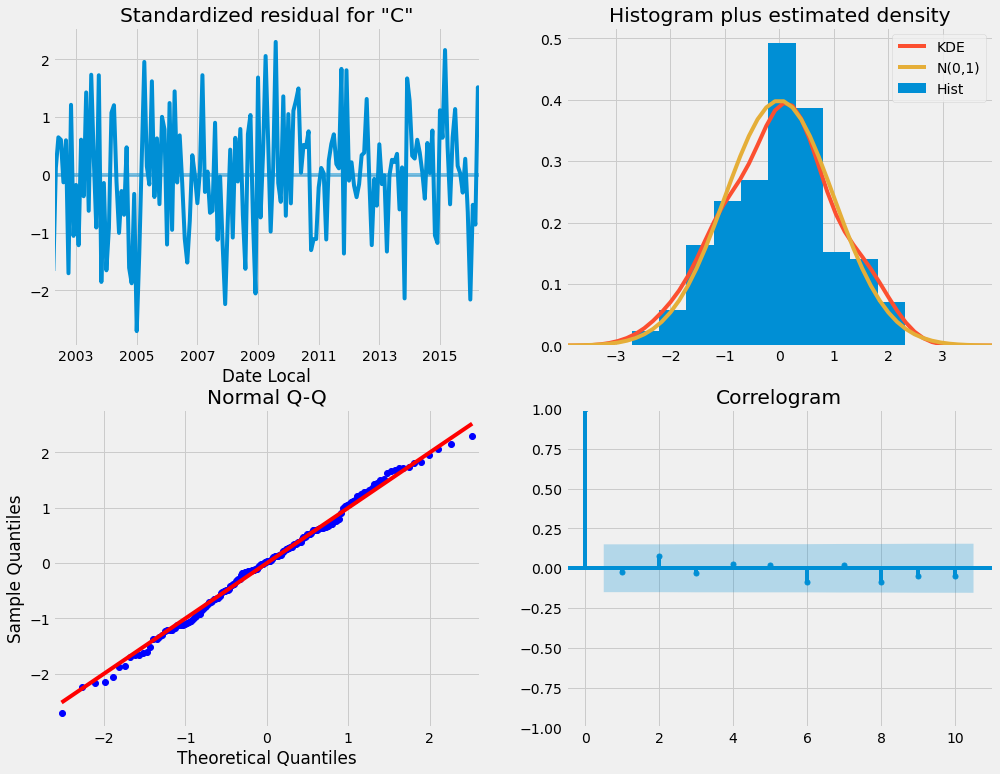

In [22]:
mod = sm.tsa.statespace.SARIMAX(yc2,
                                order=(1,1,1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(15, 12))
plt.show()

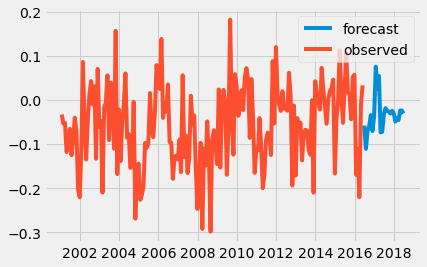

In [23]:
# Create SARIMA mean forecast
sarima_pred = results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(sarima_mean, label='forecast')
plt.plot(yc2, label='observed')
plt.legend()
plt.show()

In [25]:
# Create forecast object
forecast_object = results.get_forecast(steps=25)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

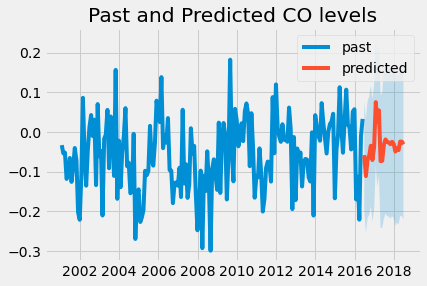

In [26]:
plt.figure()

# Plot past co levels
plt.plot(yc2.index, yc2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.title('Past and Predicted CO levels')
plt.legend()
plt.show()

#Now onto Ozone!

Text(0, 0.5, 'O3 AQI')

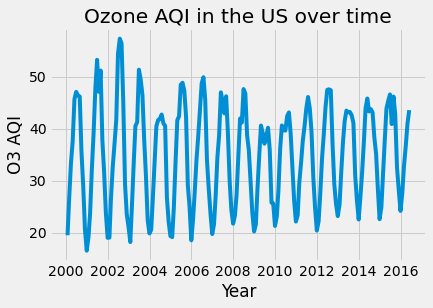

In [29]:
#refresher
plt.plot(yo)
plt.title('Ozone AQI in the US over time')
plt.xlabel('Year')
plt.ylabel('O3 AQI')

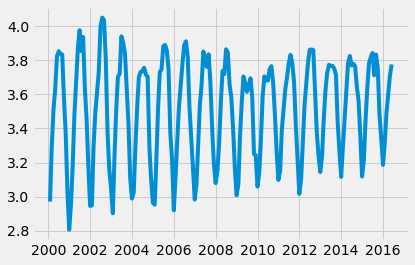

In [125]:
#log of co aqi levels
plt.plot(np.log(yo))

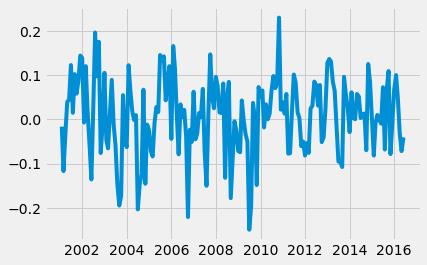

In [127]:
#remove seasonality
plt.plot(np.log(yo).diff(12))

In [30]:
result = adfuller(yo)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.3623062624770455


In [31]:
yo2 = np.log(yo).diff(12).dropna()

In [32]:
result = adfuller(yo2)
print('The p-value for the ADF test is ', result[1])

The p-value for the ADF test is  0.0017848476065492778


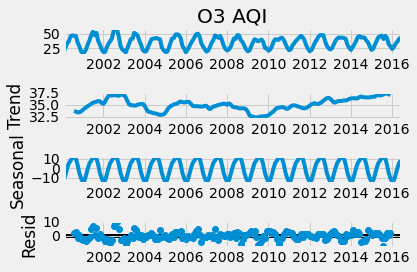

In [33]:
# Perform additive decomposition
decomp = seasonal_decompose(yo, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yo2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-379.9653519319092
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-395.43937051748895
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-179.52999085337538
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-298.6454002054462
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-383.30825517841583
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-393.96831749344614
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-240.54326402802334
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-315.9738749474062
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-401.8589674285397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-424.5892171760637
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-196.82095041311527
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-316.4101404342525
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-411.8582624185228
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-423.3691846324881
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-267.9665267217998
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-338.15471666852216
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-335.1410437465256
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-386

#ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-434.24119815441554 is our lowest AIC score and associated order

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.065      7.494      0.000       0.361       0.616
ma.S.L12      -0.6673      0.085     -7.804      0.000      -0.835      -0.500
sigma2         0.0043      0.000     11.083      0.000       0.004       0.005


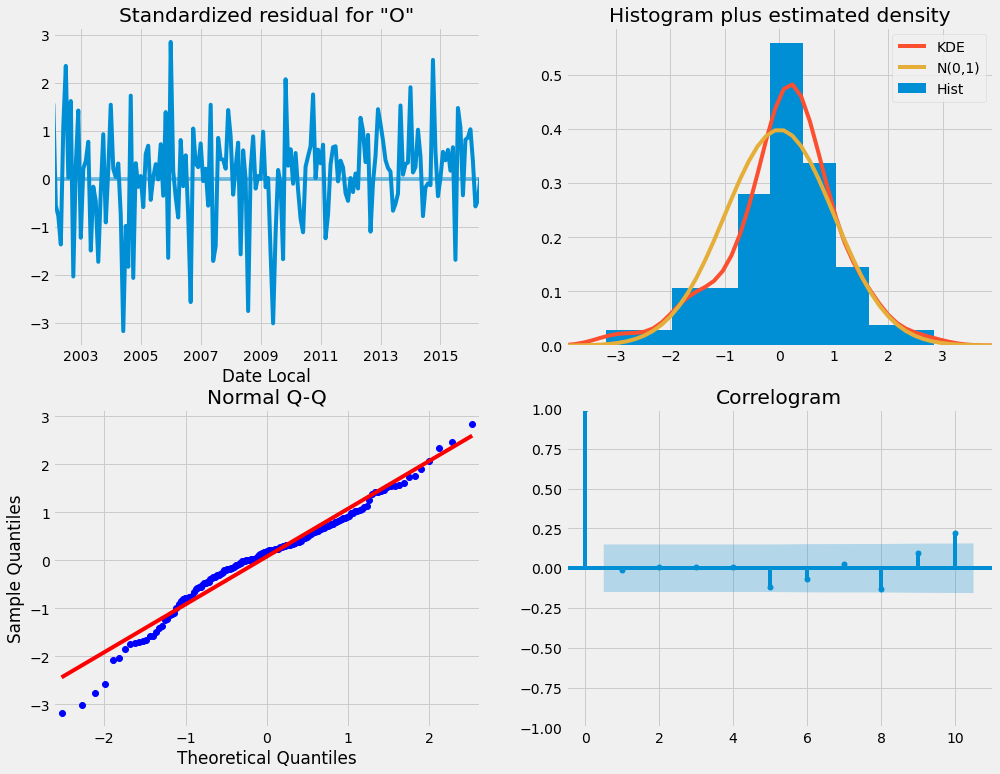

In [35]:
mod = sm.tsa.statespace.SARIMAX(yo2,
                                order=(1,0,0),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [36]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               O3 AQI   No. Observations:                  185
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 220.121
Date:                              Wed, 07 Jul 2021   AIC                           -434.241
Time:                                      08:41:44   BIC                           -424.799
Sample:                                  01-31-2001   HQIC                          -430.410
                                       - 05-31-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.065      7.494      0.000       0.361       0.616
ma.S.L12      -0.66

#Here we've run into a problem because the Prob(JB) score indicates that the data is not normally distributes. Going to try something else to find the right model.

In [2]:
pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pmdarima as pm

In [41]:
results = pm.auto_arima(yo, seasonal=True, m=12)

In [42]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  197
Model:             SARIMAX(2, 0, 4)x(0, 0, [1], 12)   Log Likelihood                -463.289
Date:                              Wed, 07 Jul 2021   AIC                            944.578
Time:                                      14:17:27   BIC                            974.127
Sample:                                           0   HQIC                           956.540
                                              - 197                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.4058      0.134     70.053      0.000       9.143       9.669
ar.L1          1.73

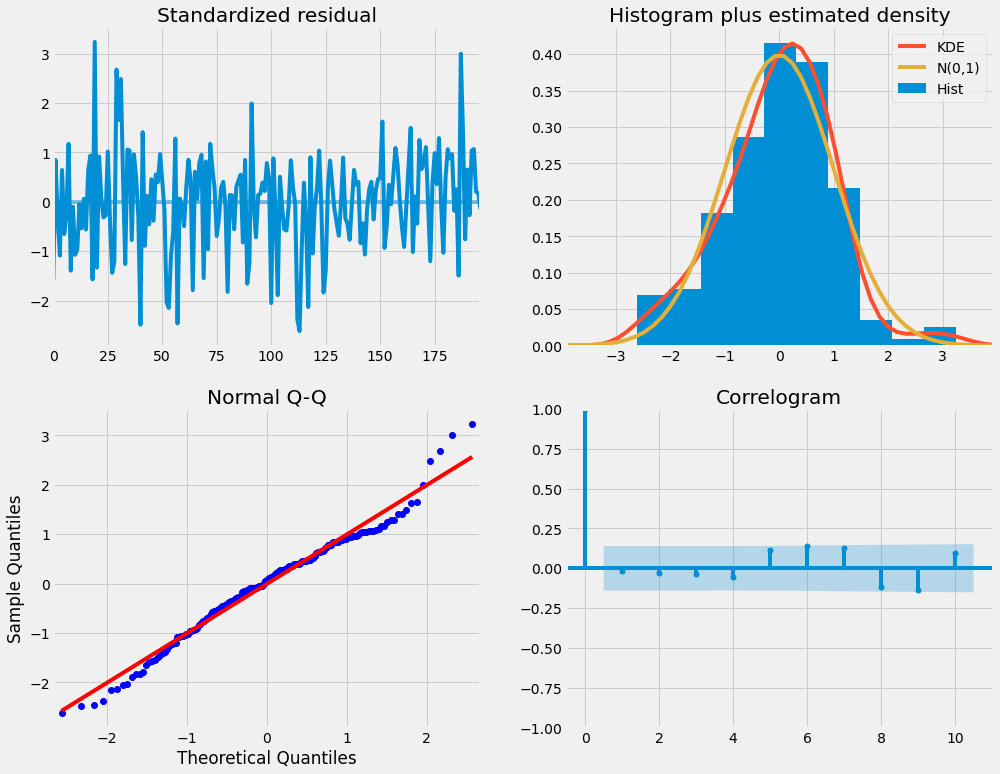

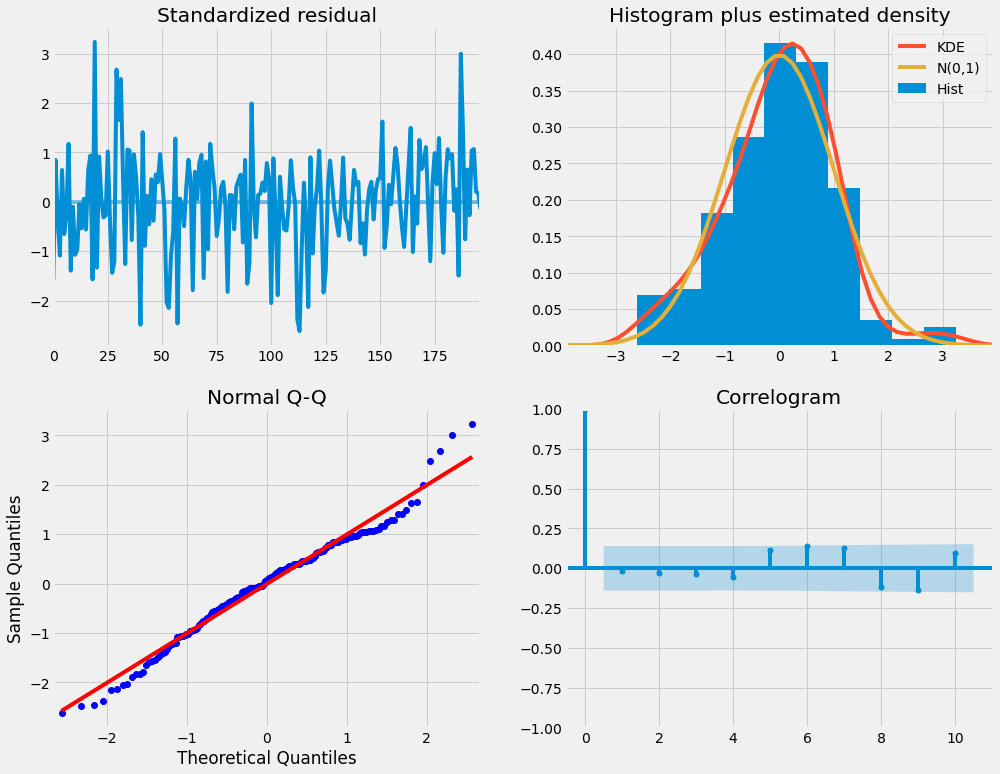

In [40]:
results.plot_diagnostics(figsize=(15, 12))

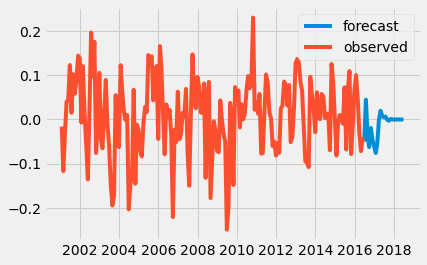

In [44]:
mod = sm.tsa.statespace.SARIMAX(yo2,
                                order=(2,0,4),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results1 = mod.fit()
# Create SARIMA mean forecast
sarima_pred = results1.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(sarima_mean, label='forecast')
plt.plot(yo2, label='observed')
plt.legend()
plt.show()

In [45]:
# Create forecast object
forecast_object = results1.get_forecast(steps=25)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

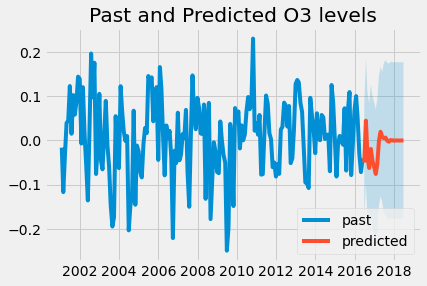

In [46]:
plt.figure()

# Plot past co levels
plt.plot(yo2.index, yo2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.title('Past and Predicted O3 levels')
plt.legend()
plt.show()

#Finally, on to sulfur dioxide